<a href="https://colab.research.google.com/github/philsaurabh/Image-Processing-tutorials/blob/main/Image_processing_tutorial_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install necessary libraries

# Matplotlib
Matplotlib is library for creating static, animated, and interactive visualizations in Python.

# Pillow
Pillow is a Python Imaging Library (PIL), which adds support for opening, manipulating, and saving images.

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Opening an Image
To open an image, use the **open()** method from the PIL Image module. Similarly, we can use the matplotlib library to read and show images. It uses an image module for working with images. It offers two useful methods imread() and imshow()

* imread() – to read the images
* imshow() – to display the images

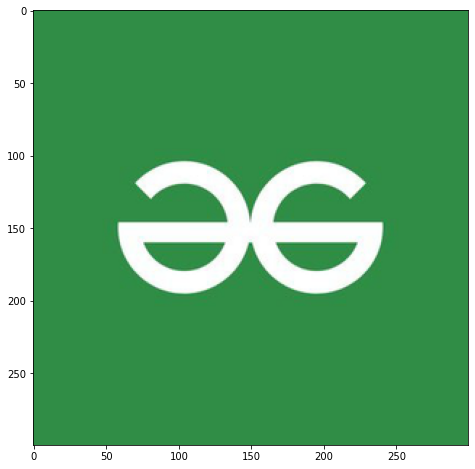

In [4]:
import urllib.request

urllib.request.urlretrieve(
  'https://media.geeksforgeeks.org/wp-content/uploads/20210318103632/gfg-300x300.png',
   "gfg.png")

img = np.array(Image.open('gfg.png'))
plt.figure(figsize=(8,8))
plt.imshow(img)

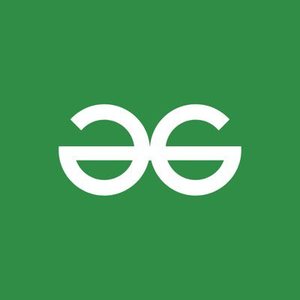

In [3]:
Image.open('gfg.png')

# Check the Details of the image

In [5]:
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image
print('Dtype: ',img.dtype)
print(img[20, 20])                # pixel value at [R, G, B]
print(img[:, :, 2].min())         # min pixel value at channel B

# of dims:  3
Img shape:  (300, 300, 3)
Dtype:  uint8
[ 48 141  70]
54


# Saving ndarray as Image

In [6]:
path = 'gfg.jpg'
pil_img = Image.fromarray(img)
pil_img.save(path)

# Rotating an Image
image(ndarray) -> transpose -> mirror image across y axis (middle column)

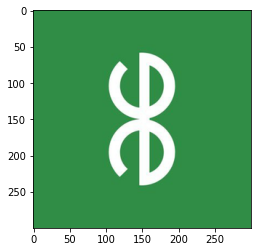

In [7]:
plt.imshow(np.rot90(img))

# Negative of an Image
* Get the RGB values of the pixel
* Calculate new RGB values using R = 255 – R, G = 255 – G, B = 255- B
* Save the new RGB values in the pixel

Text(0.5, 1.0, 'Negative of RGB image')

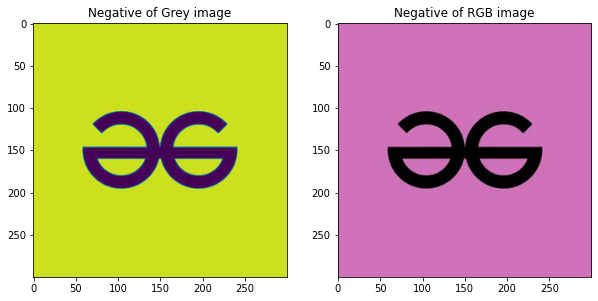

In [8]:
fig = plt.figure(figsize=(10, 10))
img_grey = img.sum(2) / (255*3)
img_grey = 255*3 - img_grey       # 255 * 3 because we added along channel axis previously
fig.add_subplot(1, 2, 1)
plt.imshow(img_grey)
plt.title('Negative of Grey image')
img = 255 - img
fig.add_subplot(1, 2, 2)# nrows, ncols, index
plt.imshow(img)
plt.title('Negative of RGB image')

# Padding Black Spaces

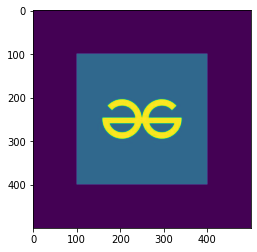

In [ ]:
img = np.array(Image.open('gfg.jpg'))
img_grey = img.sum(2) / (255*3)
img0 = img_grey.copy()
img0 = np.pad(img0, ((100,100),(100,100)))#  mode='constant'
plt.imshow(img0)

# Visualizing RGB Channels

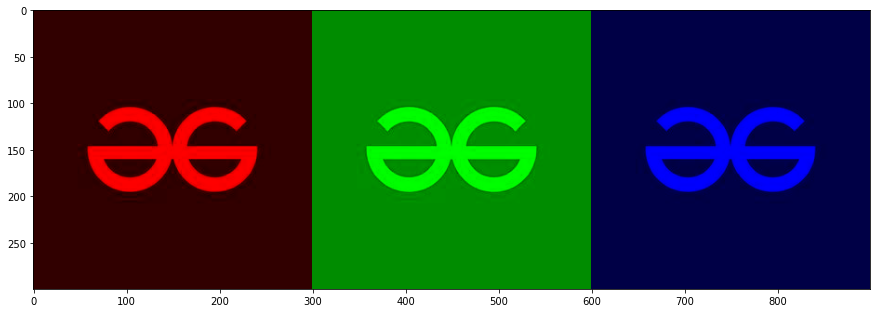

In [ ]:
img = np.array(Image.open('gfg.jpg'))
img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

# Colour Reduction

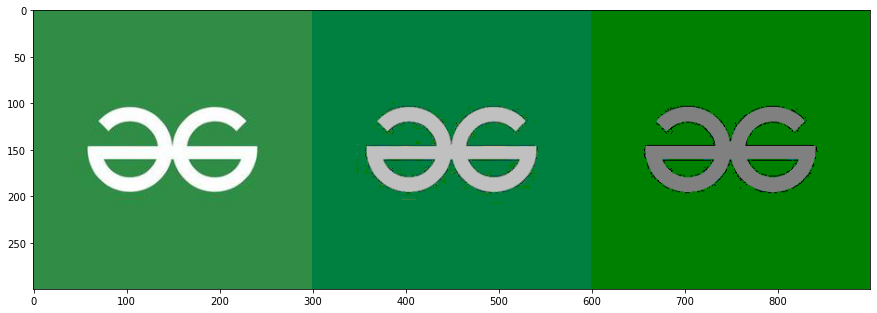

In [ ]:
img = np.array(Image.open('gfg.jpg'))
# Making Pixel values discrete by first division by // which gives int and then multiply by the same factor
img_0 = (img // 64) * 64
img_1 = (img // 128) * 128
img_all = np.concatenate((img, img_0, img_1), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_all)

# Trim Image

Text(0.5, 1.0, 'Trimmed')

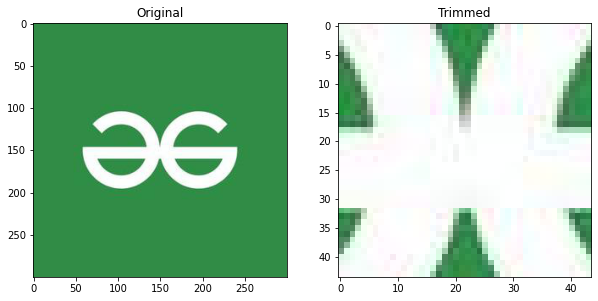

In [ ]:
img = np.array(Image.open('gfg.jpg'))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
img0 = img[128:-128, 128:-128, :]
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Trimmed')

# Pasting With Slice

Text(0.5, 1.0, 'Pasted with slice')

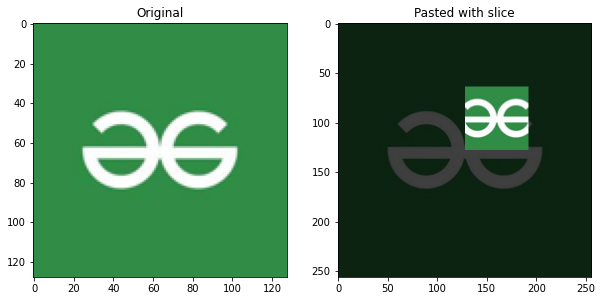

In [ ]:
src = np.array(Image.open('gfg.jpg').resize((128, 128)))
dst = np.array(Image.open('gfg.jpg').resize((256, 256))) // 4
dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96]
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(src)
plt.title('Original')
fig.add_subplot(1, 2, 2)
plt.imshow(dst_copy)
plt.title('Pasted with slice')

# Binarize Image(Enhancing some part of image)

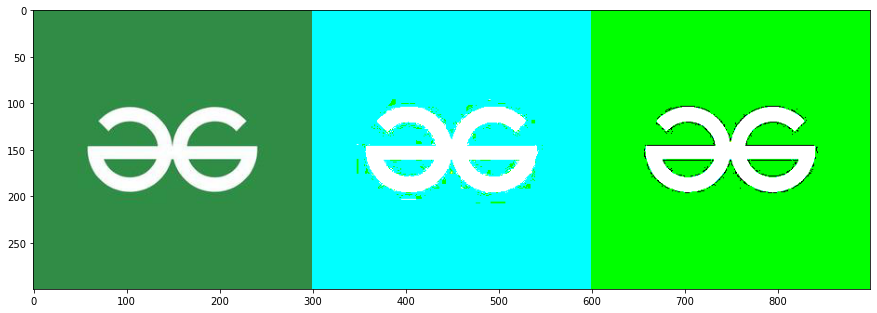

In [ ]:
img = np.array(Image.open('gfg.jpg'))
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(15, 15))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

# Ways to Flip an Image
* np.flipud() : [up/down]flips over x-axis
* np.fliplr() : [left/right]flips over y_axis

# Q: Flip Image without using these methods.

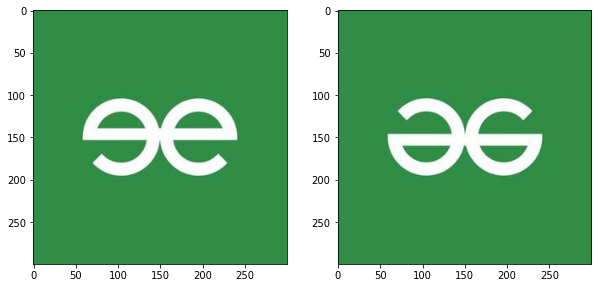

In [11]:
img = np.array(Image.open('gfg.jpg'))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(np.flipud(img))
fig.add_subplot(1, 2, 2)
plt.imshow(np.fliplr(img))

# Blending Two Images

uint8


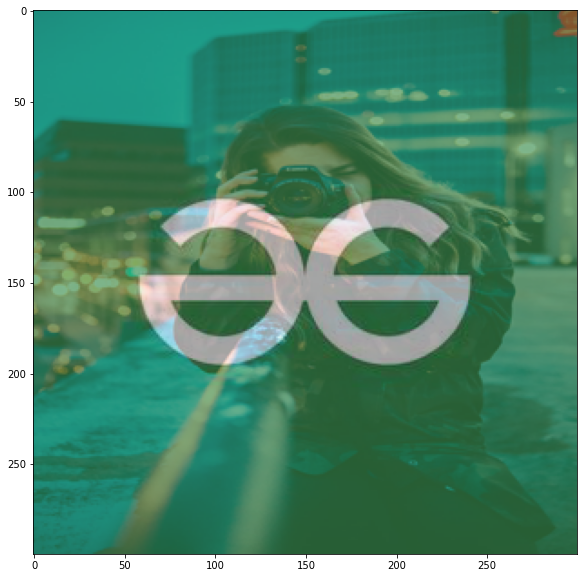

In [ ]:
img = np.array(Image.open('gfg.jpg'))
img0 = np.array(Image.open('img.jpeg').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT)
print(img.dtype)
# uint8
dst = (img * 0.6 + img0 * 0.4).astype(np.uint8)   # Blending them in
plt.figure(figsize=(10, 10))
plt.imshow(dst)

# Histogram For Pixel Intensity

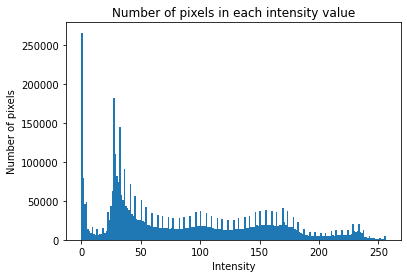

In [ ]:
img = np.array(Image.open('img.jpeg'))
img_flat = img.flatten()
plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()

In [ ]:
import cv2

In [ ]:
image_path= "/content/gfg.png"
image= cv2.imread(image_path)

In [ ]:
# you can use cv2.imshow for show the image
window_name= "Image"
#cv2.imshow(window_name, image) # shows the image
#milliseconds= 0 # if milliseconds = 0, image window stays on until you press any button
#cv2.waitKey(milliseconds) # if i press any button, close the image window
#cv2.destroyAllWindows() 

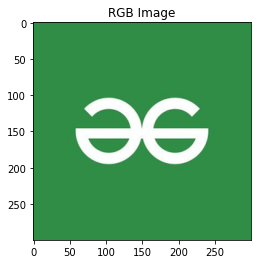

In [ ]:
img= cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converting the BGR color format to RGB
plt.imshow(img), plt.title("RGB Image");

In [ ]:
flag= cv2.IMREAD_GRAYSCALE # or we could use 0 for the flag
# If we change the flag, cv2.imread method reads in a different color format, i used cv2.IMREAD_GRAYSCALE for the flag
image_gray= cv2.imread(image_path, flag) 

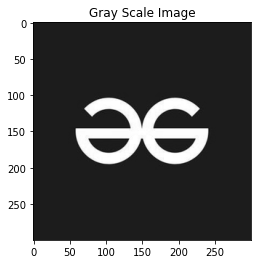

In [ ]:
cmap= "gray" # cmap should be "gray" for grayscale images
plt.imshow(image_gray, cmap= cmap), plt.title("Gray Scale Image");

In [ ]:
bgr_image= cv2.imread("gfg.jpg")
rgb_image= cv2.cvtColor(bgr_image, code= cv2.COLOR_BGR2RGB)
hsv_image= cv2.cvtColor(bgr_image, code= cv2.COLOR_BGR2HSV)# Hue Saturation Value
grayscale_image= cv2.cvtColor(bgr_image, code= cv2.COLOR_BGR2GRAY)

print("BGR Image Shape: {}\nRGB Image Shape: {}\nHSV Image Shape: {}\nGrayScale Image Shape: {}\n".\
     format(bgr_image.shape, rgb_image.shape, hsv_image.shape, grayscale_image.shape))

BGR Image Shape: (300, 300, 3)
RGB Image Shape: (300, 300, 3)
HSV Image Shape: (300, 300, 3)
GrayScale Image Shape: (300, 300)



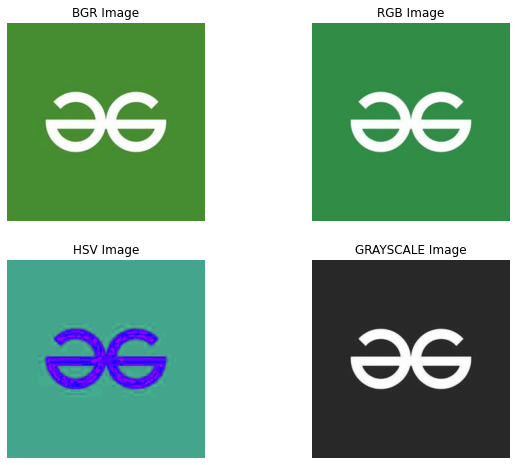

In [ ]:
plt.figure(figsize= (10,8))
plt.subplot(2,2,1), plt.imshow(bgr_image), plt.title("BGR Image"), plt.axis("off");
plt.subplot(2,2,2), plt.imshow(rgb_image), plt.title("RGB Image"), plt.axis("off");
plt.subplot(2,2,3), plt.imshow(hsv_image), plt.title("HSV Image"), plt.axis("off");
plt.subplot(2,2,4), plt.imshow(grayscale_image, cmap= "gray"), plt.title("GRAYSCALE Image"), plt.axis("off");

In [ ]:
redChannelAverage= rgb_image[:,:,0].mean()
greenChannelAverage= rgb_image[:,:,1].mean()
blueChannelAverage= rgb_image[:,:,2].mean()
print("Red Channel Average: {}\nGreen Channel Average: {}\nBlue Channel Average: {}".\
     format(redChannelAverage, greenChannelAverage, blueChannelAverage))

Red Channel Average: 67.53096666666667
Green Channel Average: 150.3367888888889
Blue Channel Average: 86.7801


# Histogram

cv2.calcHist(images, channels, mask, histSize, ranges, hist, accumulate)

* **images :** it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
* **channels :** it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* **mask :** mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.
* **histSize :** this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
ranges : this is our RANGE. Normally, it is [0,256].

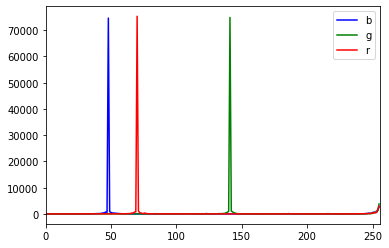

In [ ]:
# Calculate Histogram using OpenCV
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img], channels= [i], mask= None, histSize= [256], ranges= [0,256])
    plt.plot(histr,color = col, label= col)
    plt.legend()
    plt.xlim([0,256])
plt.show()

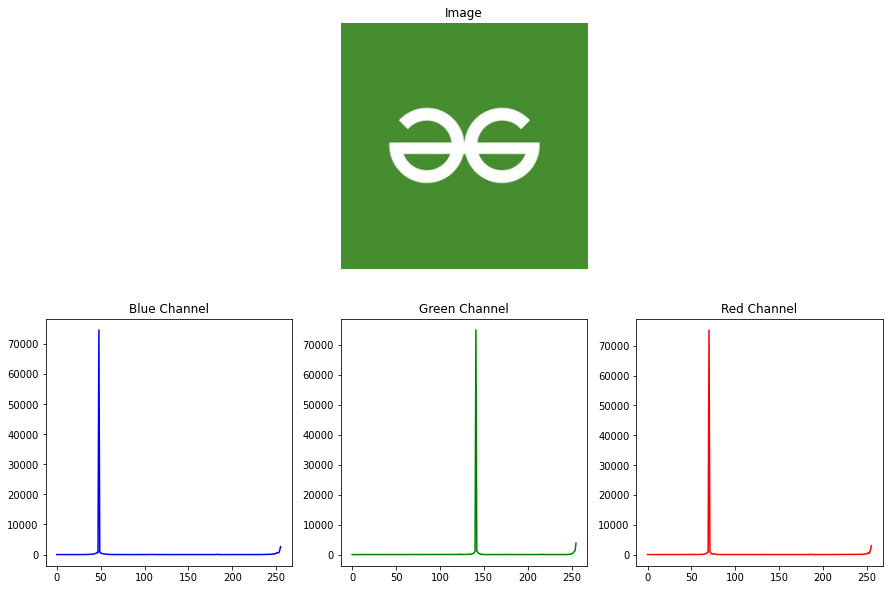

In [ ]:
# Individual
b= cv2.calcHist([img], channels= [0], mask= None, histSize= [256], ranges= [0,256])
g= cv2.calcHist([img], channels= [1], mask= None, histSize= [256], ranges= [0,256])
r= cv2.calcHist([img], channels= [2], mask= None, histSize= [256], ranges= [0,256])
plt.figure(figsize= (15,10))
plt.subplot(232), plt.imshow(img[:,:,[2,1,0]]), plt.axis("off"), plt.title("Image")
plt.subplot(234), plt.plot(b, color= "b"), plt.title("Blue Channel")
plt.subplot(235), plt.plot(g, color= "g"), plt.title("Green Channel")
plt.subplot(236), plt.plot(r, color= "r"), plt.title("Red Channel")
plt.show()

# There are multiple other methods.

# Dataset loading

In [ ]:
import pandas as pd
import numpy as np
import os
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

from  matplotlib import pyplot as plt

import tensorflow as tf
import os
import PIL
import tensorflow as tf
import cv2
import random
from tensorflow import keras
import matplotlib.image as mpimg

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'Path to test image folder'

In [ ]:
plt.figure(figsize=(20,20))

test_folder=r'Path to test image folder'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
img_data, class_name =create_dataset(r'Training dataset path')

# Other method

In [ ]:
import tensorflow as tf
import glob
first = glob.glob('/path to one classs folder/*.*')
second = glob.glob('//path to another classs folder/*.*')

data=[]
labels=[]
for i in first:
   try:
      image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (320, 320))
   except:
      image=tf.keras.preprocessing.image.load_img("gfg.jpg", color_mode='rgb', target_size= (320, 320))
      
   image=np.array(image)
   data.append(image)
   labels.append(0)

   
for i in second:
   try:
      image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (320, 320))
   except:
      image=tf.keras.preprocessing.image.load_img("gfg.jpg", color_mode='rgb', target_size= (320, 320))
    
   image=np.array(image)
   data.append(image)
   labels.append(1)

data = np.array(data)
labels = np.array(labels)


# Try it
Load a dataset using the above methods.